<a href="https://colab.research.google.com/github/paulodigital/desafio_lojas/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import folium




url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()
loja2.head()
loja3.head()
loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento



In [83]:
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento Loja 1: R$ {faturamento_loja1}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4}")


Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58


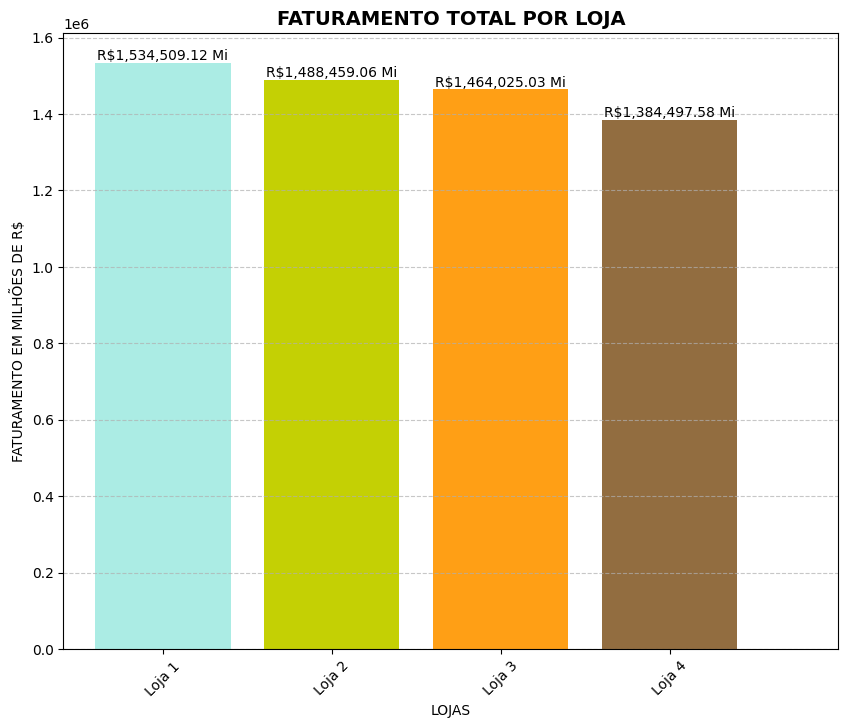

In [84]:
faturamento_Total = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
grafico = ['#abece4', '#c4d004', '#FF9F15', '#926D40']

plt.figure(figsize=(10, 8))
bars = plt.bar(lojas,faturamento_Total, color = grafico)
plt.xlabel('LOJAS')
plt.ylabel('FATURAMENTO EM MILHÕES DE R$')
plt.title('FATURAMENTO TOTAL POR LOJA', fontsize=14, fontweight='bold')
plt.bar_label(bars, fmt='R${:,.2f} Mi')
plt.xlim(right=4)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.savefig('faturamento_total_loja.png')
plt.show()

# 2. Vendas por Categoria

In [85]:
categorias={}

categorias['Loja1'] = loja1['Categoria do Produto'].value_counts()
categorias['Loja2'] = loja2['Categoria do Produto'].value_counts()
categorias['Loja3'] = loja3['Categoria do Produto'].value_counts()
categorias['Loja4'] = loja4['Categoria do Produto'].value_counts()
df_categorias = pd.DataFrame(categorias)
df_categorias.fillna(0, inplace=True)



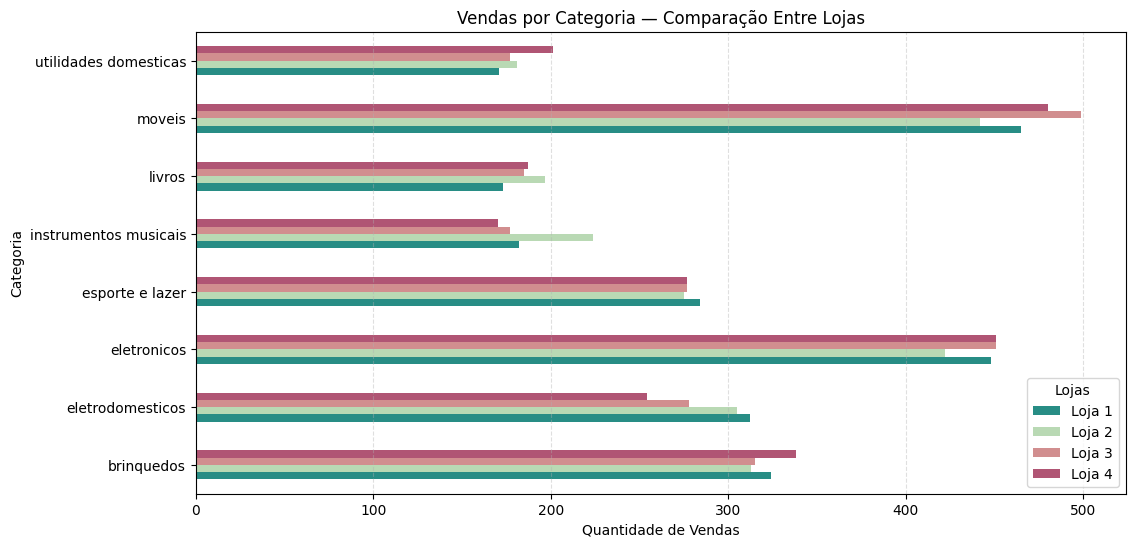

In [86]:
cat1 = loja1['Categoria do Produto'].value_counts()
cat2 = loja2['Categoria do Produto'].value_counts()
cat3 = loja3['Categoria do Produto'].value_counts()
cat4 = loja4['Categoria do Produto'].value_counts()

df_categorias = pd.DataFrame({'Loja 1': cat1, 'Loja 2': cat2, 'Loja 3': cat3, 'Loja 4': cat4,}).fillna(0)
cores = ["#288d85", "#B9D9B4", "#D18E8F", "#B05574"]


df_categorias.plot(kind='barh', figsize=(12,6), color=cores)

plt.title("Vendas por Categoria — Comparação Entre Lojas")
plt.ylabel("Categoria")
plt.xlabel("Quantidade de Vendas")
plt.xticks(rotation=0)
plt.legend(title="Lojas")
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()

# 3. Média de Avaliação das Lojas


In [87]:
avaliacoes = {}
avaliacoes['Lojas'] = ['Loja1', 'Loja2', 'Loja3', 'Loja4']
avaliacoes['Media de Avaliacoes']=[loja1['Avaliação da compra'].mean(), loja2['Avaliação da compra'].mean(), loja3['Avaliação da compra'].mean(), loja4['Avaliação da compra'].mean()]
for i in range(len(avaliacoes['Media de Avaliacoes'])):
  avaliacoes['Media de Avaliacoes'][i] = round(avaliacoes['Media de Avaliacoes'][i],2)

df_avaliacoes = pd.DataFrame(avaliacoes)



In [88]:
pd.DataFrame(avaliacoes)




,Lojas,Media de Avaliacoes
0,Loja1,3.98
1,Loja2,4.04
2,Loja3,4.05
3,Loja4,4.00


# 4. Produtos Mais e Menos Vendidos

In [89]:
from typing import Any
def tabela(loja, n):
  mais_vendidos = {'Produto':loja['Produto'].value_counts().head().to_dict().keys(), 'Quantidade':loja['Produto'].value_counts().head().to_dict().values()}
  menos_vendidos = {'Produto':loja['Produto'].value_counts().tail().to_dict().keys(), 'Quantidade':loja['Produto'].value_counts().tail().to_dict().values()}
  print(f'VENDAS - LOJA {n}: \n')
  print(f'**PRODUTOS MAIS VENDIDOS: \n\n {pd.DataFrame(mais_vendidos)} \n\n **PRODUTOS MENOS VENDIDOS: \n\n {pd.DataFrame(menos_vendidos)} \n\n')


In [90]:
tabela(loja1, 1)
tabela(loja2, 2)
tabela(loja3, 3)
tabela(loja4, 4)


VENDAS - LOJA 1: 

**PRODUTOS MAIS VENDIDOS: 

               Produto  Quantidade
0         Micro-ondas          60
1       TV Led UHD 4K          60
2       Guarda roupas          60
3  Secadora de roupas          58
4              Cômoda          56 

 **PRODUTOS MENOS VENDIDOS: 

                        Produto  Quantidade
0  Ciência de dados com python          39
1                     Pandeiro          36
2            Panela de pressão          35
3                      Headset          33
4                 Celular ABXY          33 


VENDAS - LOJA 2: 

**PRODUTOS MAIS VENDIDOS: 

                     Produto  Quantidade
0  Iniciando em programação          65
1               Micro-ondas          62
2                   Bateria          61
3                    Violão          58
4                  Pandeiro          58 

 **PRODUTOS MENOS VENDIDOS: 

              Produto  Quantidade
0     Fone de ouvido          37
1           Poltrona          35
2     Mesa de jantar          34
3

# 5. Frete Médio por Loja

In [91]:
frete_medio = {'Lojas': ['Loja1', 'Loja2', 'Loja3', 'Loja4'], 'Média': [round(loja1.Frete.mean(),2), round(loja2.Frete.mean(),2), round(loja3.Frete.mean(),2), round(loja4.Frete.mean(),2)]  }

In [92]:
pd.DataFrame(frete_medio)

,Lojas,Média
0,Loja1,34.69
1,Loja2,33.62
2,Loja3,33.07
3,Loja4,31.28


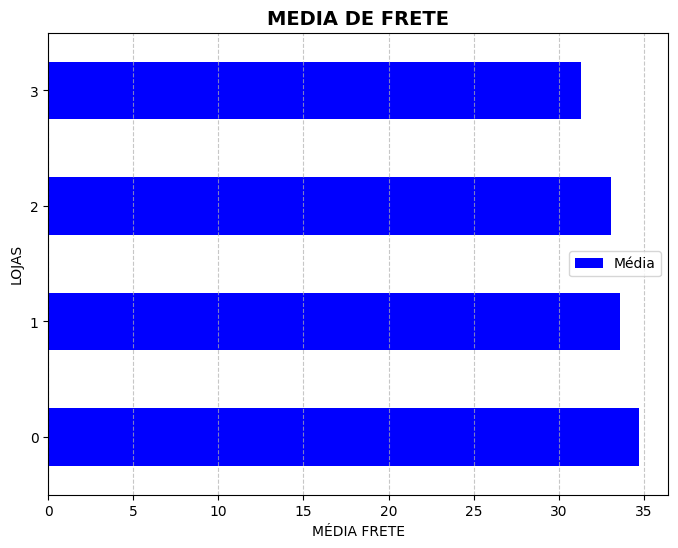

In [93]:
pd.DataFrame(frete_medio).plot(kind='barh', color='blue', xlabel='MÉDIA FRETE', ylabel='LOJAS', figsize=(8,6))
plt.title('MEDIA DE FRETE', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('frete_medio.png')
plt.show()

# 📊 Análise de Desempenho das Lojas  

O presente relatório tem como finalidade avaliar o desempenho de quatro unidades comerciais e indicar qual delas apresenta maior viabilidade para desinvestimento (venda), fundamentando a recomendação nos dados coletados e ilustrando os resultados por meio de gráficos comparativos.  

Os indicadores analisados incluem:  
- **Faturamento total** (em milhões)  
- **Categorias de produtos** mais e menos comercializadas  
- **Média das avaliações de clientes** por loja  
- **Produtos com maior e menor volume de vendas**  
- **Custo médio de frete** praticado por unidade  

---

## 📈 Resultados Obtidos  

- **Faturamento:** A **Loja1** lidera em lucratividade, seguida por **Loja2**, **Loja3** e, por último, **Loja4**, que apresenta o menor retorno financeiro.

- **Categorias de vendas:** Apenas a **Loja4** encontra-se abaixo da média geral de desempenho por categoria.
- **Avaliações de clientes:** As notas da **Loja1** e **Loja4** são semelhantes, porém inferiores às obtidas pela **Loja2** e **Loja3**, que se destacam positivamente nesse aspecto.
- **Frete médio:** A **Loja4** possui o menor custo de frete, seguida por **Loja3**, **Loja2** e **Loja1**.  
- **Produtos mais vendidos:** A liderança é da **Loja2**, seguida por **Loja1**, **Loja4** e, em último lugar, **Loja3**.  
- **Produtos menos vendidos:** A **Loja3** concentra o maior número de itens com baixa saída, seguida por **Loja4**, **Loja1** e **Loja2**.  

---

## 📝 Considerações Finais  

A análise evidencia que a **Loja2** e a **Loja3** mantêm desempenho intermediário, sem grandes oscilações nos indicadores.  

Já a **Loja1** e a **Loja4** apresentam maior variabilidade: ora ocupam posições de destaque, ora figuram entre os piores resultados. Essa inconsistência compromete a previsibilidade de desempenho. Contudo, a **Loja1** ainda se sobressai por gerar maior faturamento e volume de vendas.  

Diante dos dados, e considerando o **lucro como critério decisivo**, recomenda-se a **alienação da Loja4**, por apresentar menor rentabilidade e elevada instabilidade nos indicadores avaliados.  

---
